In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_ta as pta

import pandas_datareader as web

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
#AMZN is the name of the Amazon stocks in yahoo finance
data = web.get_data_yahoo('AMZN', start = datetime.datetime(2010, 6, 29), 
                             end = date.today())
#data = pd.read_csv("TSLA Stocks.csv")

data = data[['Adj Close']]
data.columns = ['Price']
data.head()

,Price
Date,
2010-06-29,108.610001
2010-06-30,109.260002
2010-07-01,110.959999
2010-07-02,109.139999
2010-07-06,110.059998


In [8]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 2870 number of days in the dataset.


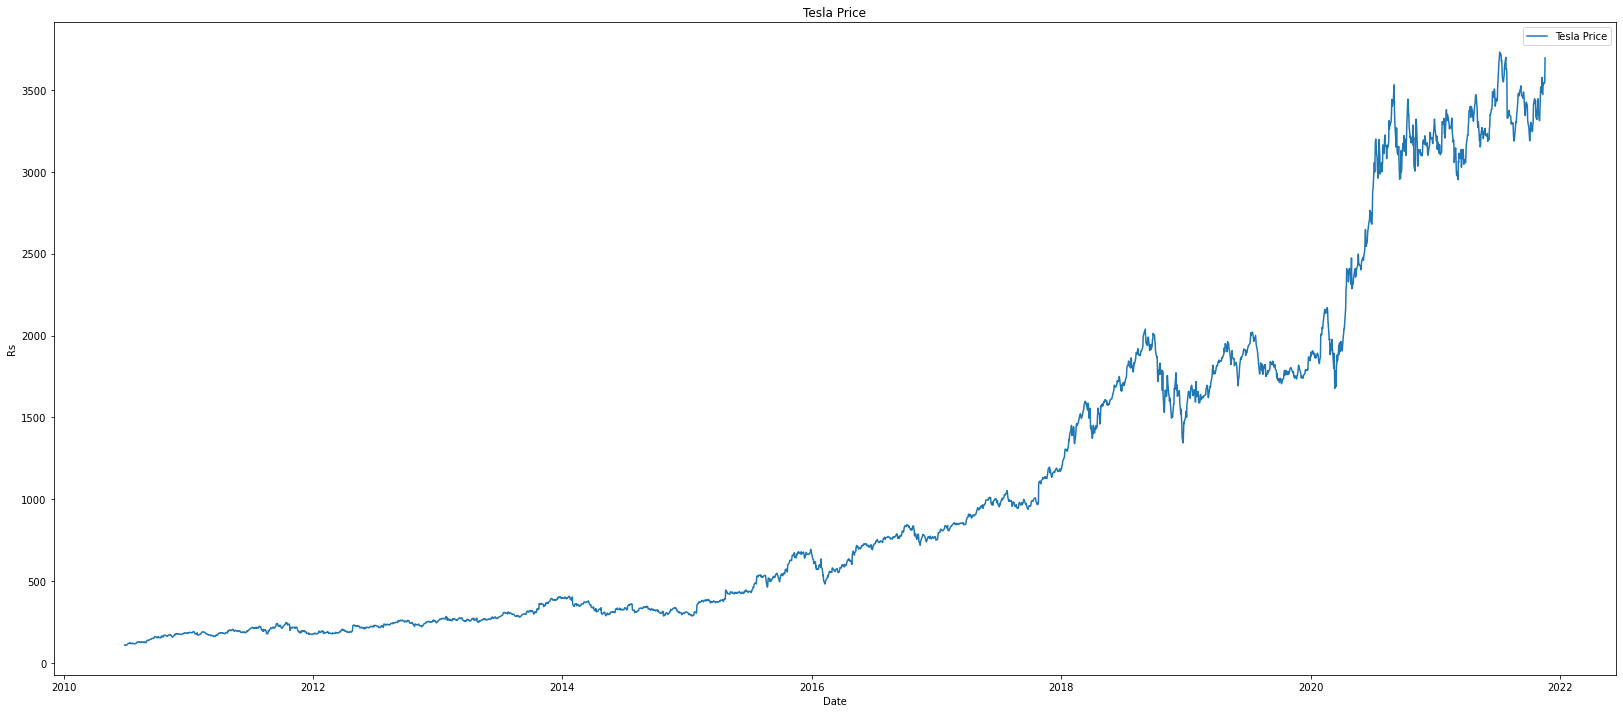

In [9]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['Price'], label='Tesla Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('Tesla Price')
plt.legend()
plt.show()

In [10]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Price'].rolling(window = 21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])

    #Create RSI
    dataset['RSI'] = pta.rsi(dataset['Price'], length = 14)
    return dataset

In [11]:
df = get_technical_indicators(data)
df

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2010-06-29,108.610001,NaN,NaN,108.610001,108.610001,0.000000,NaN,NaN,NaN,108.610001,107.610001,4.678514,NaN
2010-06-30,109.260002,NaN,NaN,108.947501,108.962085,0.014583,NaN,NaN,NaN,109.097502,108.260002,4.684536,NaN
2010-07-01,110.959999,NaN,NaN,109.670572,109.741871,0.071299,NaN,NaN,NaN,110.386923,109.959999,4.700117,NaN
2010-07-02,109.139999,NaN,NaN,109.522247,109.551884,0.029636,NaN,NaN,NaN,109.545250,108.139999,4.683427,NaN
2010-07-06,110.059998,NaN,NaN,109.646954,109.689936,0.042983,NaN,NaN,NaN,109.889833,109.059998,4.691898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,3525.149902,3505.842843,3426.153344,3421.016812,3462.005721,40.988909,73.021892,3572.197128,3280.109559,3511.086042,3524.149902,8.167395,58.620763
2021-11-15,3545.679932,3515.654262,3432.660958,3430.251117,3474.878677,44.627559,77.378181,3587.417321,3277.904595,3534.148635,3544.679932,8.173203,59.960579
2021-11-16,3540.699951,3518.755685,3437.135242,3438.432512,3485.005027,46.572514,80.870718,3598.876678,3275.393806,3538.516179,3539.699951,8.171797,59.457666


In [12]:
df = df.dropna()
df.head()

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2010-07-28,117.129997,118.447142,116.715238,117.804766,118.283087,0.478321,4.689526,126.094289,107.336187,117.296030,116.129997,4.754710,54.137509
2010-07-29,116.860001,117.984286,117.108095,117.719009,118.058457,0.339448,4.306495,125.721086,108.495105,117.005344,115.860001,4.752383,53.213706
2010-07-30,117.889999,118.050000,117.519048,117.734275,118.031973,0.297698,3.914015,125.347078,109.691017,117.595114,116.889999,4.761233,56.278752
2010-08-02,120.070000,118.050000,117.952857,117.939685,118.351310,0.411625,3.646399,125.245655,110.660059,119.245038,119.070000,4.779712,61.959085
2010-08-03,122.419998,118.557142,118.585238,118.328305,118.987023,0.658718,3.160818,124.906874,112.263603,121.361678,121.419998,4.799256,66.944693


In [13]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.plot(dataset['RSI'],label='RSI',  linestyle='-.')

    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

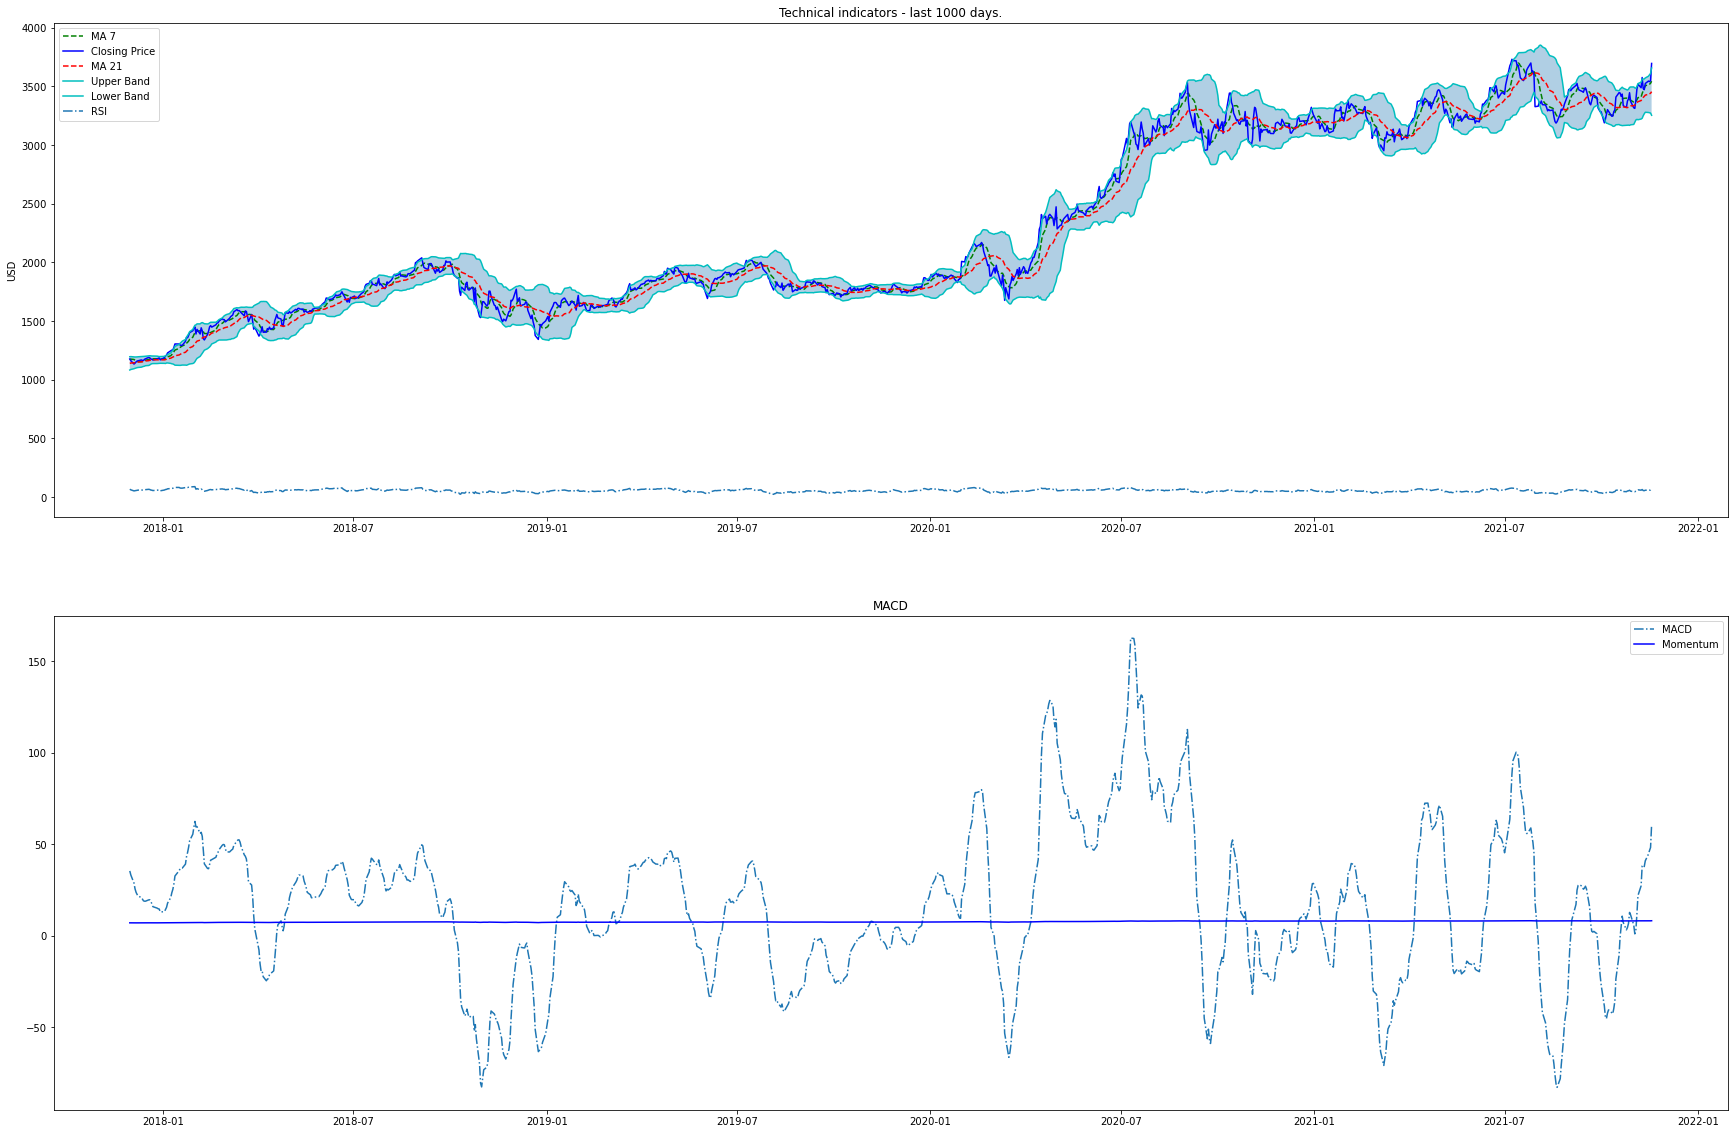

In [14]:
plot_technical_indicators(df, 1000)

Text(0.5, 1.0, 'Params')

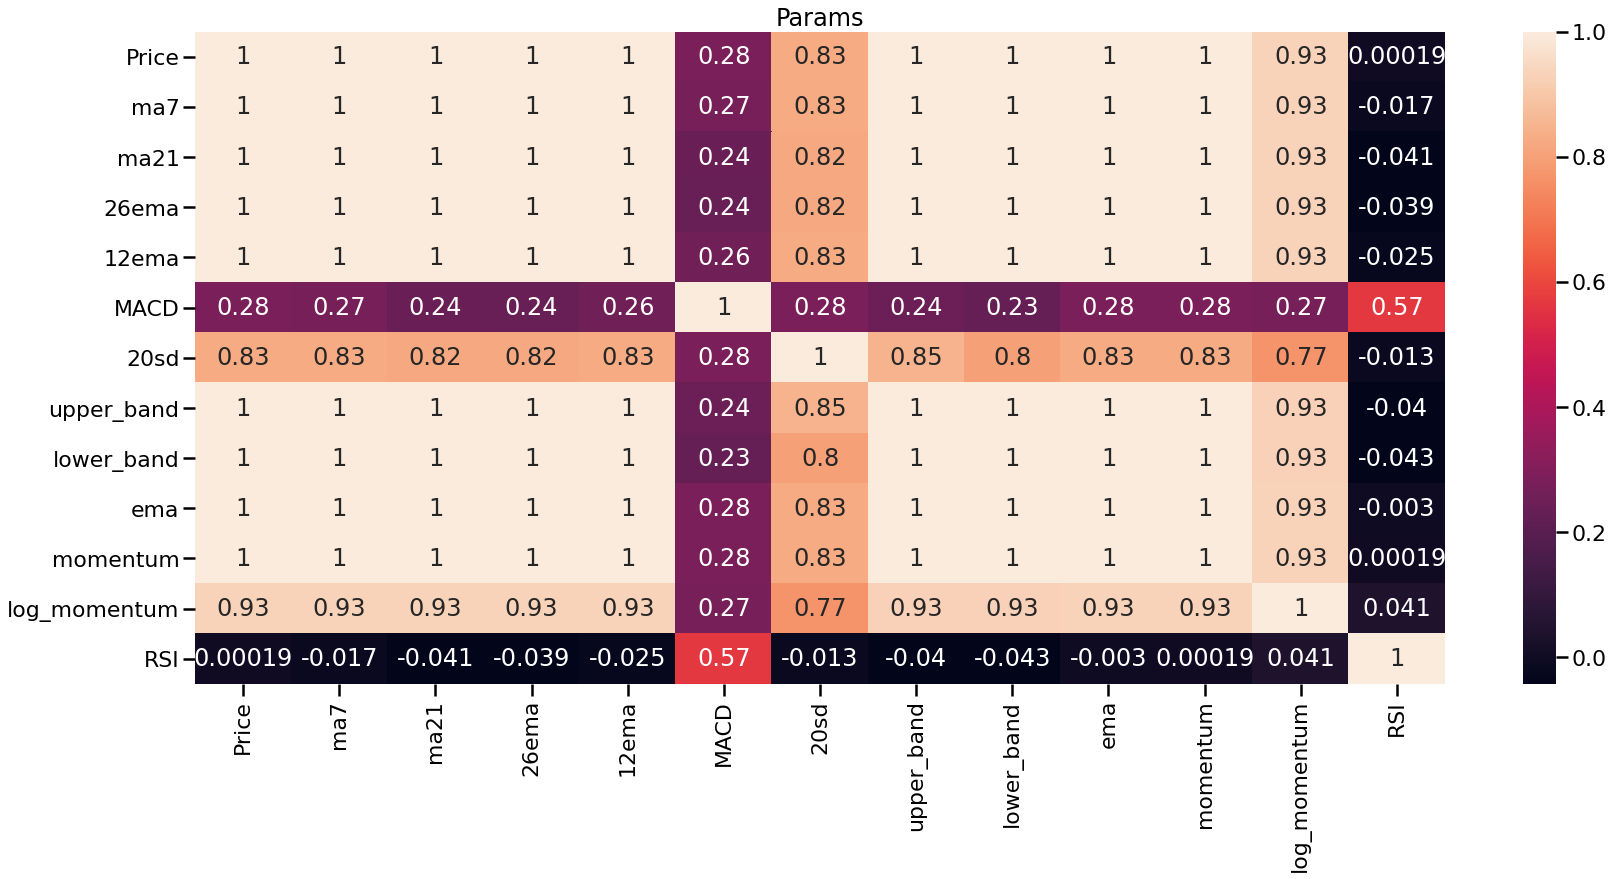

In [15]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')


In [16]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 2850 samples, and 13 features.


In [17]:
df.columns

Index(['Price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum', 'RSI'],
      dtype='object')

In [18]:
df

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2010-07-28,117.129997,118.447142,116.715238,117.804766,118.283087,0.478321,4.689526,126.094289,107.336187,117.296030,116.129997,4.754710,54.137509
2010-07-29,116.860001,117.984286,117.108095,117.719009,118.058457,0.339448,4.306495,125.721086,108.495105,117.005344,115.860001,4.752383,53.213706
2010-07-30,117.889999,118.050000,117.519048,117.734275,118.031973,0.297698,3.914015,125.347078,109.691017,117.595114,116.889999,4.761233,56.278752
2010-08-02,120.070000,118.050000,117.952857,117.939685,118.351310,0.411625,3.646399,125.245655,110.660059,119.245038,119.070000,4.779712,61.959085
2010-08-03,122.419998,118.557142,118.585238,118.328305,118.987023,0.658718,3.160818,124.906874,112.263603,121.361678,121.419998,4.799256,66.944693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,3525.149902,3505.842843,3426.153344,3421.016812,3462.005721,40.988909,73.021892,3572.197128,3280.109559,3511.086042,3524.149902,8.167395,58.620763
2021-11-15,3545.679932,3515.654262,3432.660958,3430.251117,3474.878677,44.627559,77.378181,3587.417321,3277.904595,3534.148635,3544.679932,8.173203,59.960579
2021-11-16,3540.699951,3518.755685,3437.135242,3438.432512,3485.005027,46.572514,80.870718,3598.876678,3275.393806,3538.516179,3539.699951,8.171797,59.457666


In [19]:
data_training = df[df.index < '2019-01-31'].copy()
data_training

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2010-07-28,117.129997,118.447142,116.715238,117.804766,118.283087,0.478321,4.689526,126.094289,107.336187,117.296030,116.129997,4.754710,54.137509
2010-07-29,116.860001,117.984286,117.108095,117.719009,118.058457,0.339448,4.306495,125.721086,108.495105,117.005344,115.860001,4.752383,53.213706
2010-07-30,117.889999,118.050000,117.519048,117.734275,118.031973,0.297698,3.914015,125.347078,109.691017,117.595114,116.889999,4.761233,56.278752
2010-08-02,120.070000,118.050000,117.952857,117.939685,118.351310,0.411625,3.646399,125.245655,110.660059,119.245038,119.070000,4.779712,61.959085
2010-08-03,122.419998,118.557142,118.585238,118.328305,118.987023,0.658718,3.160818,124.906874,112.263603,121.361678,121.419998,4.799256,66.944693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-24,1654.930054,1667.840018,1590.746198,1617.444921,1641.653632,24.208711,96.745480,1784.237158,1397.255239,1651.349087,1653.930054,7.410910,54.776293
2019-01-25,1670.569946,1667.270002,1606.299055,1621.380108,1646.102296,24.722188,79.869401,1766.037856,1446.560254,1664.162993,1669.569946,7.420321,56.486366
2019-01-28,1637.890015,1660.714286,1614.250959,1622.603064,1644.838868,22.235804,73.796892,1761.844743,1466.657175,1646.647674,1636.890015,7.400553,52.056830


In [20]:
data_testing = df[df.index >= '2019-01-31'].copy()
data_testing

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2019-01-31,1718.729980,1655.207153,1640.032389,1631.179788,1653.924999,22.745211,52.436744,1744.905878,1535.158900,1696.078802,1717.729980,7.448759,59.690570
2019-02-01,1626.229980,1653.237148,1644.180007,1630.813136,1649.664227,18.851091,47.244154,1738.668315,1549.691700,1649.512921,1625.229980,7.393405,49.622867
2019-02-04,1633.310059,1650.148577,1650.514771,1630.998093,1647.148201,16.150108,34.064967,1718.644705,1582.384836,1638.711013,1632.310059,7.397752,50.313652
2019-02-05,1658.810059,1648.468593,1654.487154,1633.058238,1648.942333,15.884095,29.412707,1713.312567,1595.661740,1652.110377,1657.810059,7.413253,52.822811
2019-02-06,1640.260010,1648.807164,1654.999058,1633.591703,1647.606591,14.014888,29.047545,1713.094148,1596.903969,1644.210132,1639.260010,7.402000,50.812554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,3525.149902,3505.842843,3426.153344,3421.016812,3462.005721,40.988909,73.021892,3572.197128,3280.109559,3511.086042,3524.149902,8.167395,58.620763
2021-11-15,3545.679932,3515.654262,3432.660958,3430.251117,3474.878677,44.627559,77.378181,3587.417321,3277.904595,3534.148635,3544.679932,8.173203,59.960579
2021-11-16,3540.699951,3518.755685,3437.135242,3438.432512,3485.005027,46.572514,80.870718,3598.876678,3275.393806,3538.516179,3539.699951,8.171797,59.457666


In [21]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(2142, 13)


array([[1.40429429e-04, 2.46725207e-04, 0.00000000e+00, ...,
        1.40429429e-04, 8.11711981e-04, 4.57613871e-01],
       [0.00000000e+00, 0.00000000e+00, 2.11964946e-04, ...,
        0.00000000e+00, 0.00000000e+00, 4.43398063e-01],
       [5.35718292e-04, 3.50288408e-05, 4.33693055e-04, ...,
        5.35718292e-04, 3.08647321e-03, 4.90564043e-01],
       ...,
       [7.91111230e-01, 8.22350126e-01, 8.07991107e-01, ...,
        7.91111230e-01, 9.23482471e-01, 4.25595659e-01],
       [7.68220944e-01, 8.14785407e-01, 8.11388712e-01, ...,
        7.68220944e-01, 9.13978187e-01, 3.43794421e-01],
       [8.08035808e-01, 8.12823034e-01, 8.16332249e-01, ...,
        8.08035808e-01, 9.30346827e-01, 4.75389544e-01]])

In [22]:
X_train = []
y_train = []

In [23]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [24]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((2082, 60, 13), (2082,))

In [25]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 13)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [26]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            12800     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [27]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
regressor.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
33/33 [==============================] - 9s 153ms/step - loss: 0.0264
Epoch 2/10
33/33 [==============================] - 5s 147ms/step - loss: 0.0059
Epoch 3/10
33/33 [==============================] - 5s 137ms/step - loss: 0.0044
Epoch 4/10
33/33 [==============================] - 5s 142ms/step - loss: 0.0048
Epoch 5/10
33/33 [==============================] - 5s 138ms/step - loss: 0.0043
Epoch 6/10
33/33 [==============================] - 4s 132ms/step - loss: 0.0033
Epoch 7/10
33/33 [==============================] - 5s 138ms/step - loss: 0.0036
Epoch 8/10
33/33 [==============================] - 5s 138ms/step - loss: 0.0039
Epoch 9/10
33/33 [==============================] - 5s 139ms/step - loss: 0.0035
Epoch 10/10
33/33 [==============================] - 4s 128ms/step - loss: 0.0032


In [29]:
past_60 = data_training.tail(60)

dt = past_60.append(data_testing, ignore_index = True)
dt

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
0,1665.530029,1631.717163,1748.782860,1757.809487,1679.968948,-77.840539,107.711542,1964.205943,1533.359777,1637.571492,1664.530029,7.417298,42.897311
1,1665.530029,1631.907174,1737.169050,1750.973972,1677.747576,-73.226396,102.549929,1942.268909,1532.069191,1656.210517,1664.530029,7.417298,42.897311
2,1627.800049,1609.854318,1724.700003,1741.849977,1670.063341,-71.786637,98.938332,1922.576668,1526.823339,1637.270205,1626.800049,7.394370,40.466581
3,1642.810059,1609.854318,1714.147147,1734.513687,1665.870528,-68.643159,95.031975,1904.211098,1524.083196,1640.963441,1641.810059,7.403555,41.877589
4,1755.489990,1640.798601,1708.679054,1736.067487,1679.658138,-56.409350,88.688475,1886.056005,1531.302103,1717.314474,1754.489990,7.469933,51.223638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3525.149902,3505.842843,3426.153344,3421.016812,3462.005721,40.988909,73.021892,3572.197128,3280.109559,3511.086042,3524.149902,8.167395,58.620763
764,3545.679932,3515.654262,3432.660958,3430.251117,3474.878677,44.627559,77.378181,3587.417321,3277.904595,3534.148635,3544.679932,8.173203,59.960579
765,3540.699951,3518.755685,3437.135242,3438.432512,3485.005027,46.572514,80.870718,3598.876678,3275.393806,3538.516179,3539.699951,8.171797,59.457666
766,3549.000000,3527.329973,3442.128104,3446.622697,3494.850407,48.227710,84.481500,3611.091104,3273.165104,3545.505393,3548.000000,8.174139,60.058957


In [30]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(768, 13)


array([[0.13469186, 0.08437101, 0.0993455 , ..., 0.13469186, 0.21011931,
        0.33253144],
       [0.13469186, 0.08445513, 0.09375961, ..., 0.13469186, 0.21011931,
        0.33253144],
       [0.11888839, 0.07469277, 0.08776239, ..., 0.11888839, 0.18767711,
        0.29027188],
       ...,
       [0.92011981, 0.91972504, 0.91139043, ..., 0.92011981, 0.94863547,
        0.62044232],
       [0.92359634, 0.9235207 , 0.91379184, ..., 0.92359634, 0.95092796,
        0.6308961 ],
       [0.98519347, 0.93109875, 0.92022766, ..., 0.98519347, 0.99068038,
        0.78406069]])

In [31]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((708, 60, 13), (708,))

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
y_pred

array([[0.08147971],
       [0.08156777],
       [0.08156157],
       [0.08144706],
       [0.08123112],
       [0.08092164],
       [0.0805208 ],
       [0.08001936],
       [0.07941008],
       [0.07871357],
       [0.07796558],
       [0.07719128],
       [0.07640339],
       [0.0756213 ],
       [0.07485318],
       [0.07410501],
       [0.07338874],
       [0.07271469],
       [0.07209351],
       [0.07153469],
       [0.07104368],
       [0.07064299],
       [0.07036065],
       [0.07021785],
       [0.07020158],
       [0.07026332],
       [0.07034896],
       [0.07044803],
       [0.07056551],
       [0.07072204],
       [0.07093284],
       [0.07122442],
       [0.07163843],
       [0.07222424],
       [0.07304598],
       [0.07417118],
       [0.07556241],
       [0.0771727 ],
       [0.07896166],
       [0.08088116],
       [0.08289469],
       [0.08496459],
       [0.08707684],
       [0.0892446 ],
       [0.09147764],
       [0.09378286],
       [0.09617418],
       [0.098

In [34]:
scale = 1/scalar.scale_[0]

In [35]:
y_pred = y_pred*scale
y_test = y_test*scale

In [36]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

324.95153844265434

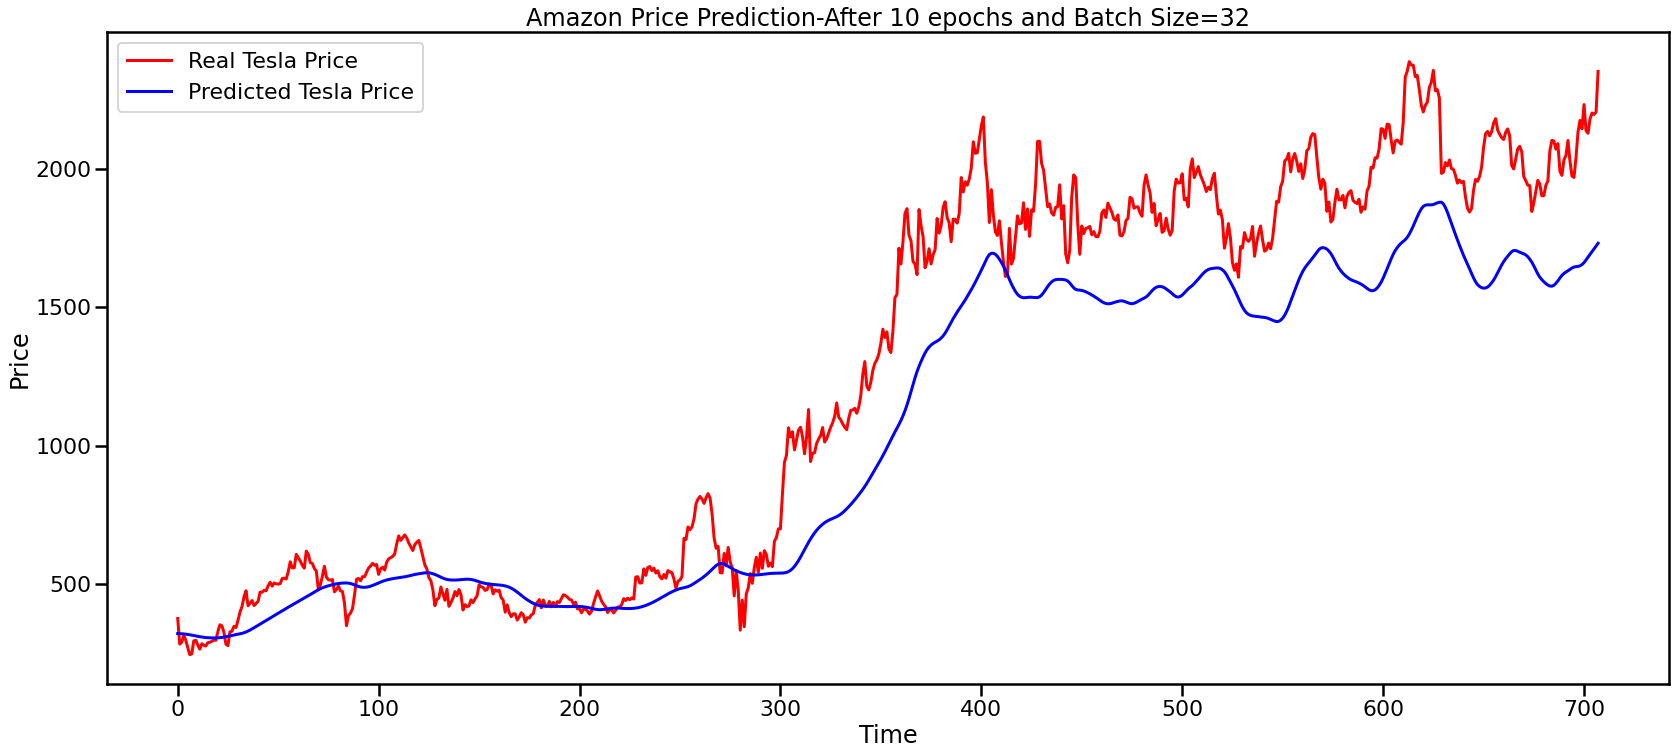

In [58]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Tesla Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Tesla Price')
plt.title('Amazon Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
regressor.fit(X_train, y_train, epochs=25, batch_size = 64)

Epoch 1/25
33/33 [==============================] - 4s 130ms/step - loss: 0.0033
Epoch 2/25
33/33 [==============================] - 4s 125ms/step - loss: 0.0029
Epoch 3/25
33/33 [==============================] - 4s 124ms/step - loss: 0.0029
Epoch 4/25
33/33 [==============================] - 4s 128ms/step - loss: 0.0029
Epoch 5/25
33/33 [==============================] - 4s 129ms/step - loss: 0.0030
Epoch 6/25
33/33 [==============================] - 4s 129ms/step - loss: 0.0030
Epoch 7/25
33/33 [==============================] - 4s 128ms/step - loss: 0.0030
Epoch 8/25
33/33 [==============================] - 4s 132ms/step - loss: 0.0029
Epoch 9/25
33/33 [==============================] - 4s 129ms/step - loss: 0.0026
Epoch 10/25
33/33 [==============================] - 4s 130ms/step - loss: 0.0026
Epoch 11/25
33/33 [==============================] - 4s 129ms/step - loss: 0.0022
Epoch 12/25
33/33 [==============================] - 5s 141ms/step - loss: 0.0022
Epoch 13/25
33/33 [======

In [39]:
past_60 = data_training.tail(60)

dt = past_60.append(data_testing, ignore_index = True)
dt

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
0,1665.530029,1631.717163,1748.782860,1757.809487,1679.968948,-77.840539,107.711542,1964.205943,1533.359777,1637.571492,1664.530029,7.417298,42.897311
1,1665.530029,1631.907174,1737.169050,1750.973972,1677.747576,-73.226396,102.549929,1942.268909,1532.069191,1656.210517,1664.530029,7.417298,42.897311
2,1627.800049,1609.854318,1724.700003,1741.849977,1670.063341,-71.786637,98.938332,1922.576668,1526.823339,1637.270205,1626.800049,7.394370,40.466581
3,1642.810059,1609.854318,1714.147147,1734.513687,1665.870528,-68.643159,95.031975,1904.211098,1524.083196,1640.963441,1641.810059,7.403555,41.877589
4,1755.489990,1640.798601,1708.679054,1736.067487,1679.658138,-56.409350,88.688475,1886.056005,1531.302103,1717.314474,1754.489990,7.469933,51.223638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3525.149902,3505.842843,3426.153344,3421.016812,3462.005721,40.988909,73.021892,3572.197128,3280.109559,3511.086042,3524.149902,8.167395,58.620763
764,3545.679932,3515.654262,3432.660958,3430.251117,3474.878677,44.627559,77.378181,3587.417321,3277.904595,3534.148635,3544.679932,8.173203,59.960579
765,3540.699951,3518.755685,3437.135242,3438.432512,3485.005027,46.572514,80.870718,3598.876678,3275.393806,3538.516179,3539.699951,8.171797,59.457666
766,3549.000000,3527.329973,3442.128104,3446.622697,3494.850407,48.227710,84.481500,3611.091104,3273.165104,3545.505393,3548.000000,8.174139,60.058957


In [40]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(768, 13)


array([[0.13469186, 0.08437101, 0.0993455 , ..., 0.13469186, 0.21011931,
        0.33253144],
       [0.13469186, 0.08445513, 0.09375961, ..., 0.13469186, 0.21011931,
        0.33253144],
       [0.11888839, 0.07469277, 0.08776239, ..., 0.11888839, 0.18767711,
        0.29027188],
       ...,
       [0.92011981, 0.91972504, 0.91139043, ..., 0.92011981, 0.94863547,
        0.62044232],
       [0.92359634, 0.9235207 , 0.91379184, ..., 0.92359634, 0.95092796,
        0.6308961 ],
       [0.98519347, 0.93109875, 0.92022766, ..., 0.98519347, 0.99068038,
        0.78406069]])

In [41]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((708, 60, 13), (708,))

In [42]:
y_pred = regressor.predict(X_test)

In [43]:
y_pred

array([[0.11323173],
       [0.11316314],
       [0.11303695],
       [0.11284649],
       [0.11259639],
       [0.11229111],
       [0.11193125],
       [0.11151312],
       [0.11103925],
       [0.11053416],
       [0.11002652],
       [0.10953354],
       [0.10906246],
       [0.10862318],
       [0.10822088],
       [0.10785761],
       [0.107538  ],
       [0.10726593],
       [0.10704423],
       [0.10687599],
       [0.10676063],
       [0.10671261],
       [0.10675554],
       [0.10690254],
       [0.10714017],
       [0.10742471],
       [0.10771076],
       [0.10798728],
       [0.10825618],
       [0.1085315 ],
       [0.10882369],
       [0.10915235],
       [0.10954747],
       [0.11003879],
       [0.11065777],
       [0.1114308 ],
       [0.11233021],
       [0.11332297],
       [0.114375  ],
       [0.11545128],
       [0.11652851],
       [0.11759117],
       [0.11864363],
       [0.11969389],
       [0.12074962],
       [0.12181026],
       [0.1228743 ],
       [0.123

In [44]:
scale = 1/scalar.scale_[0]

In [45]:
y_pred = y_pred*scale
y_test = y_test*scale

In [46]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

322.929415017238

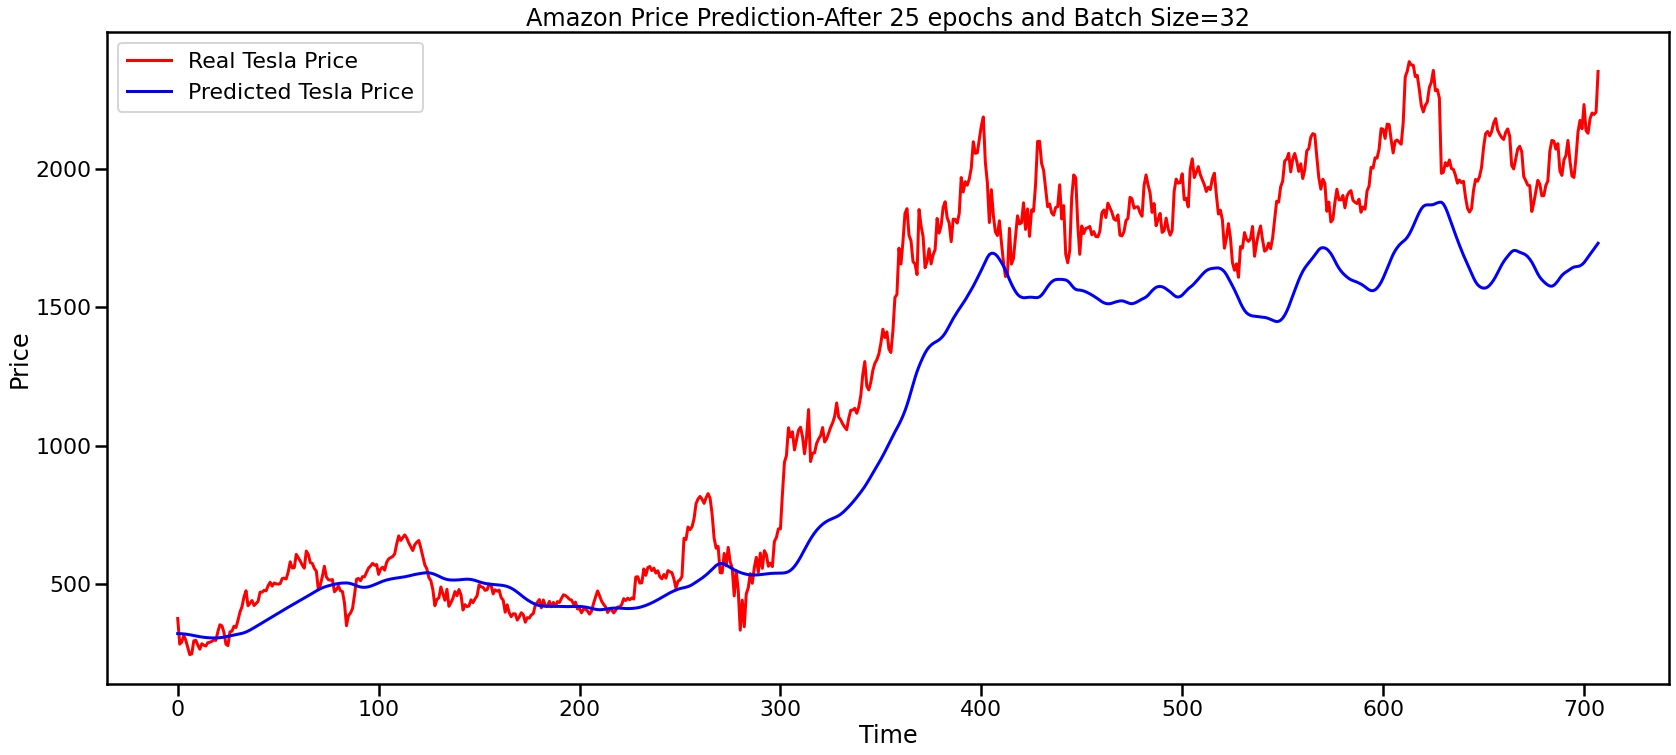

In [59]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Tesla Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Tesla Price')
plt.title('Amazon Price Prediction-After 25 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
33/33 [==============================] - 5s 138ms/step - loss: 0.0024
Epoch 2/50
33/33 [==============================] - 4s 128ms/step - loss: 0.0022
Epoch 3/50
33/33 [==============================] - 4s 126ms/step - loss: 0.0020
Epoch 4/50
33/33 [==============================] - 4s 128ms/step - loss: 0.0018
Epoch 5/50
33/33 [==============================] - 4s 131ms/step - loss: 0.0022
Epoch 6/50
33/33 [==============================] - 5s 139ms/step - loss: 0.0021
Epoch 7/50
33/33 [==============================] - 4s 127ms/step - loss: 0.0018
Epoch 8/50
33/33 [==============================] - 4s 128ms/step - loss: 0.0019
Epoch 9/50
33/33 [==============================] - 4s 131ms/step - loss: 0.0017
Epoch 10/50
33/33 [==============================] - 4s 131ms/step - loss: 0.0017
Epoch 11/50
33/33 [==============================] - 4s 133ms/step - loss: 0.0021
Epoch 12/50
33/33 [==============================] - 5s 143ms/step - loss: 0.0018
Epoch 13/50
33/33 [======

In [49]:
past_60 = data_training.tail(60)

dt = past_60.append(data_testing, ignore_index = True)
dt

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
0,1665.530029,1631.717163,1748.782860,1757.809487,1679.968948,-77.840539,107.711542,1964.205943,1533.359777,1637.571492,1664.530029,7.417298,42.897311
1,1665.530029,1631.907174,1737.169050,1750.973972,1677.747576,-73.226396,102.549929,1942.268909,1532.069191,1656.210517,1664.530029,7.417298,42.897311
2,1627.800049,1609.854318,1724.700003,1741.849977,1670.063341,-71.786637,98.938332,1922.576668,1526.823339,1637.270205,1626.800049,7.394370,40.466581
3,1642.810059,1609.854318,1714.147147,1734.513687,1665.870528,-68.643159,95.031975,1904.211098,1524.083196,1640.963441,1641.810059,7.403555,41.877589
4,1755.489990,1640.798601,1708.679054,1736.067487,1679.658138,-56.409350,88.688475,1886.056005,1531.302103,1717.314474,1754.489990,7.469933,51.223638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3525.149902,3505.842843,3426.153344,3421.016812,3462.005721,40.988909,73.021892,3572.197128,3280.109559,3511.086042,3524.149902,8.167395,58.620763
764,3545.679932,3515.654262,3432.660958,3430.251117,3474.878677,44.627559,77.378181,3587.417321,3277.904595,3534.148635,3544.679932,8.173203,59.960579
765,3540.699951,3518.755685,3437.135242,3438.432512,3485.005027,46.572514,80.870718,3598.876678,3275.393806,3538.516179,3539.699951,8.171797,59.457666
766,3549.000000,3527.329973,3442.128104,3446.622697,3494.850407,48.227710,84.481500,3611.091104,3273.165104,3545.505393,3548.000000,8.174139,60.058957


In [50]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(768, 13)


array([[0.13469186, 0.08437101, 0.0993455 , ..., 0.13469186, 0.21011931,
        0.33253144],
       [0.13469186, 0.08445513, 0.09375961, ..., 0.13469186, 0.21011931,
        0.33253144],
       [0.11888839, 0.07469277, 0.08776239, ..., 0.11888839, 0.18767711,
        0.29027188],
       ...,
       [0.92011981, 0.91972504, 0.91139043, ..., 0.92011981, 0.94863547,
        0.62044232],
       [0.92359634, 0.9235207 , 0.91379184, ..., 0.92359634, 0.95092796,
        0.6308961 ],
       [0.98519347, 0.93109875, 0.92022766, ..., 0.98519347, 0.99068038,
        0.78406069]])

In [51]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((708, 60, 13), (708,))

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
y_pred

array([[0.13419606],
       [0.13410892],
       [0.13394517],
       [0.13369247],
       [0.13335603],
       [0.13293932],
       [0.13245018],
       [0.13189028],
       [0.13126783],
       [0.13063085],
       [0.13002506],
       [0.12947497],
       [0.12898578],
       [0.12856837],
       [0.12822488],
       [0.12795232],
       [0.12775584],
       [0.12763919],
       [0.12760393],
       [0.12764722],
       [0.12776507],
       [0.12797877],
       [0.12832466],
       [0.12882023],
       [0.12943839],
       [0.13009772],
       [0.1307347 ],
       [0.13134119],
       [0.13192557],
       [0.13251194],
       [0.13311818],
       [0.13377675],
       [0.13453841],
       [0.13545483],
       [0.13658407],
       [0.13797389],
       [0.13954183],
       [0.14124995],
       [0.14306171],
       [0.14489426],
       [0.14672069],
       [0.14852715],
       [0.15032092],
       [0.15211397],
       [0.15391624],
       [0.15573367],
       [0.1575673 ],
       [0.159

In [54]:
scale = 1/scalar.scale_[0]

In [55]:
y_pred = y_pred*scale
y_test = y_test*scale

In [56]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

286.7316729915829

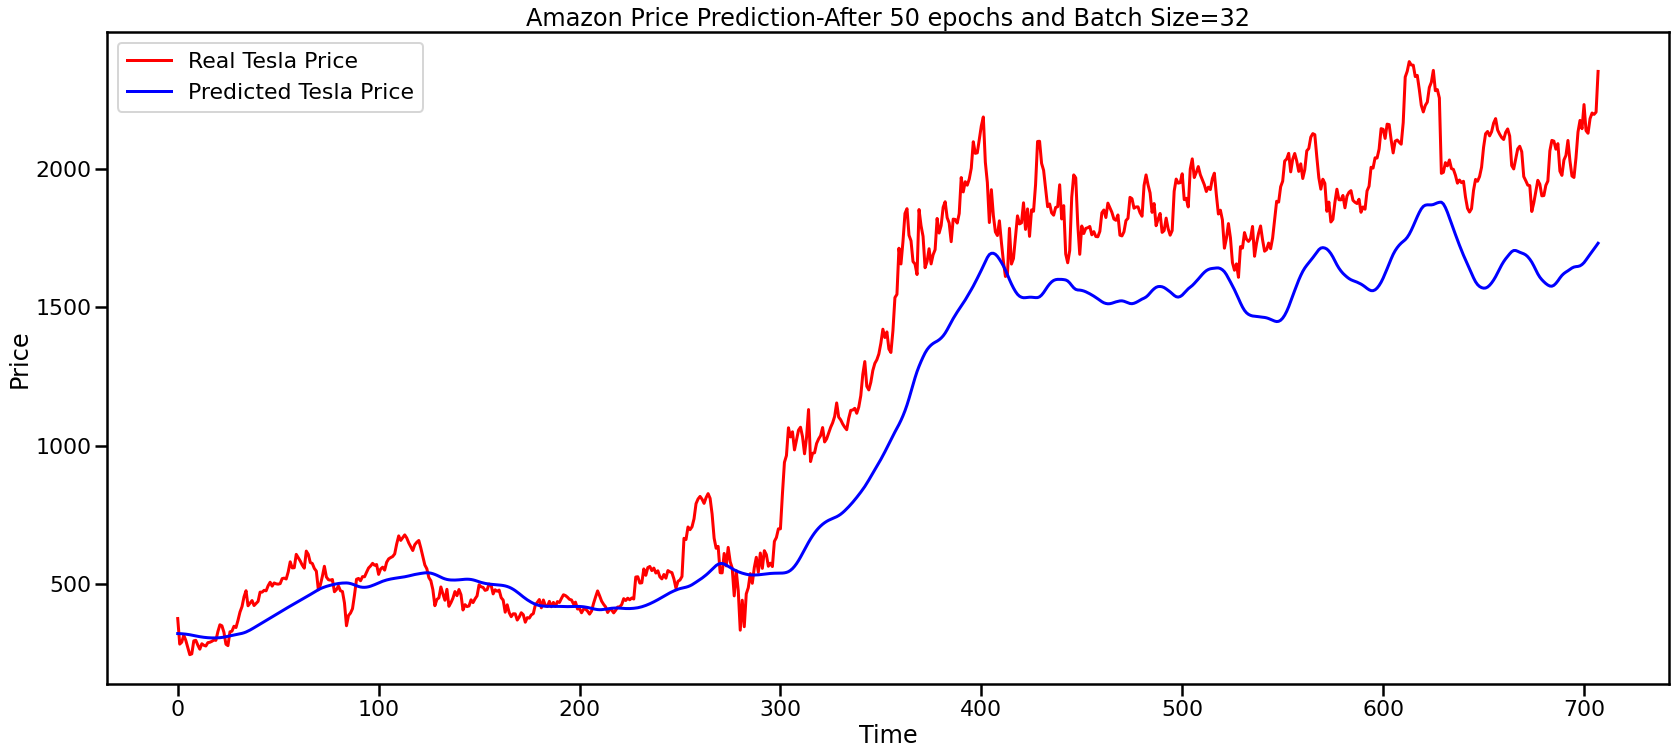

In [60]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Tesla Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Tesla Price')
plt.title('Amazon Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()